# HELP International Clustering Assingment

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Steps for assignment

>1. Data quality check
>2. EDA: Uni and bivariate analysis
>3. Outlier treatment
>4. Checking the cluster tendency: Hopkin's test 
>5. Scaling
>6. Find best val of k : Silhouette score and SSD(Elbow)
>7. Using the final val of k perform the k mean analysis
>8. visualize the cluster with scatter
>9. Cluster profiling : GDPP, child_mort, income
>10. Hierarchical clustering
>>* Single linkage: dendrogram
>>* Complete linkage: dendrogram
>>* Use one of them for final clusters
>>* Visualize scatterplot
>>* Cluster profiling: GDPP, child_mort, income

## Ultimately, using both the results from Kmeans and Hierarchial Clustering, identify the countries that are in the direst need of aid.

## 1.Data quality check 

In [3]:
ngo_dataset=pd.read_csv('Country-data.csv')
ngo_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
ngo_dataset.shape

(167, 10)

In [5]:
ngo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
ngo_dataset.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
ngo_dataset['exports']=ngo_dataset['exports']*ngo_dataset['gdpp']/100
ngo_dataset['health']=ngo_dataset['health']*ngo_dataset['gdpp']/100
ngo_dataset['imports']=ngo_dataset['imports']*ngo_dataset['gdpp']/100

In [8]:
ngo_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
ngo_dataset.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## 2.EDA: Uni and Bivariate Analysis

In [10]:
col=list(ngo_dataset.columns)

In [11]:
col

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [12]:
list(enumerate(col[1:]))

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

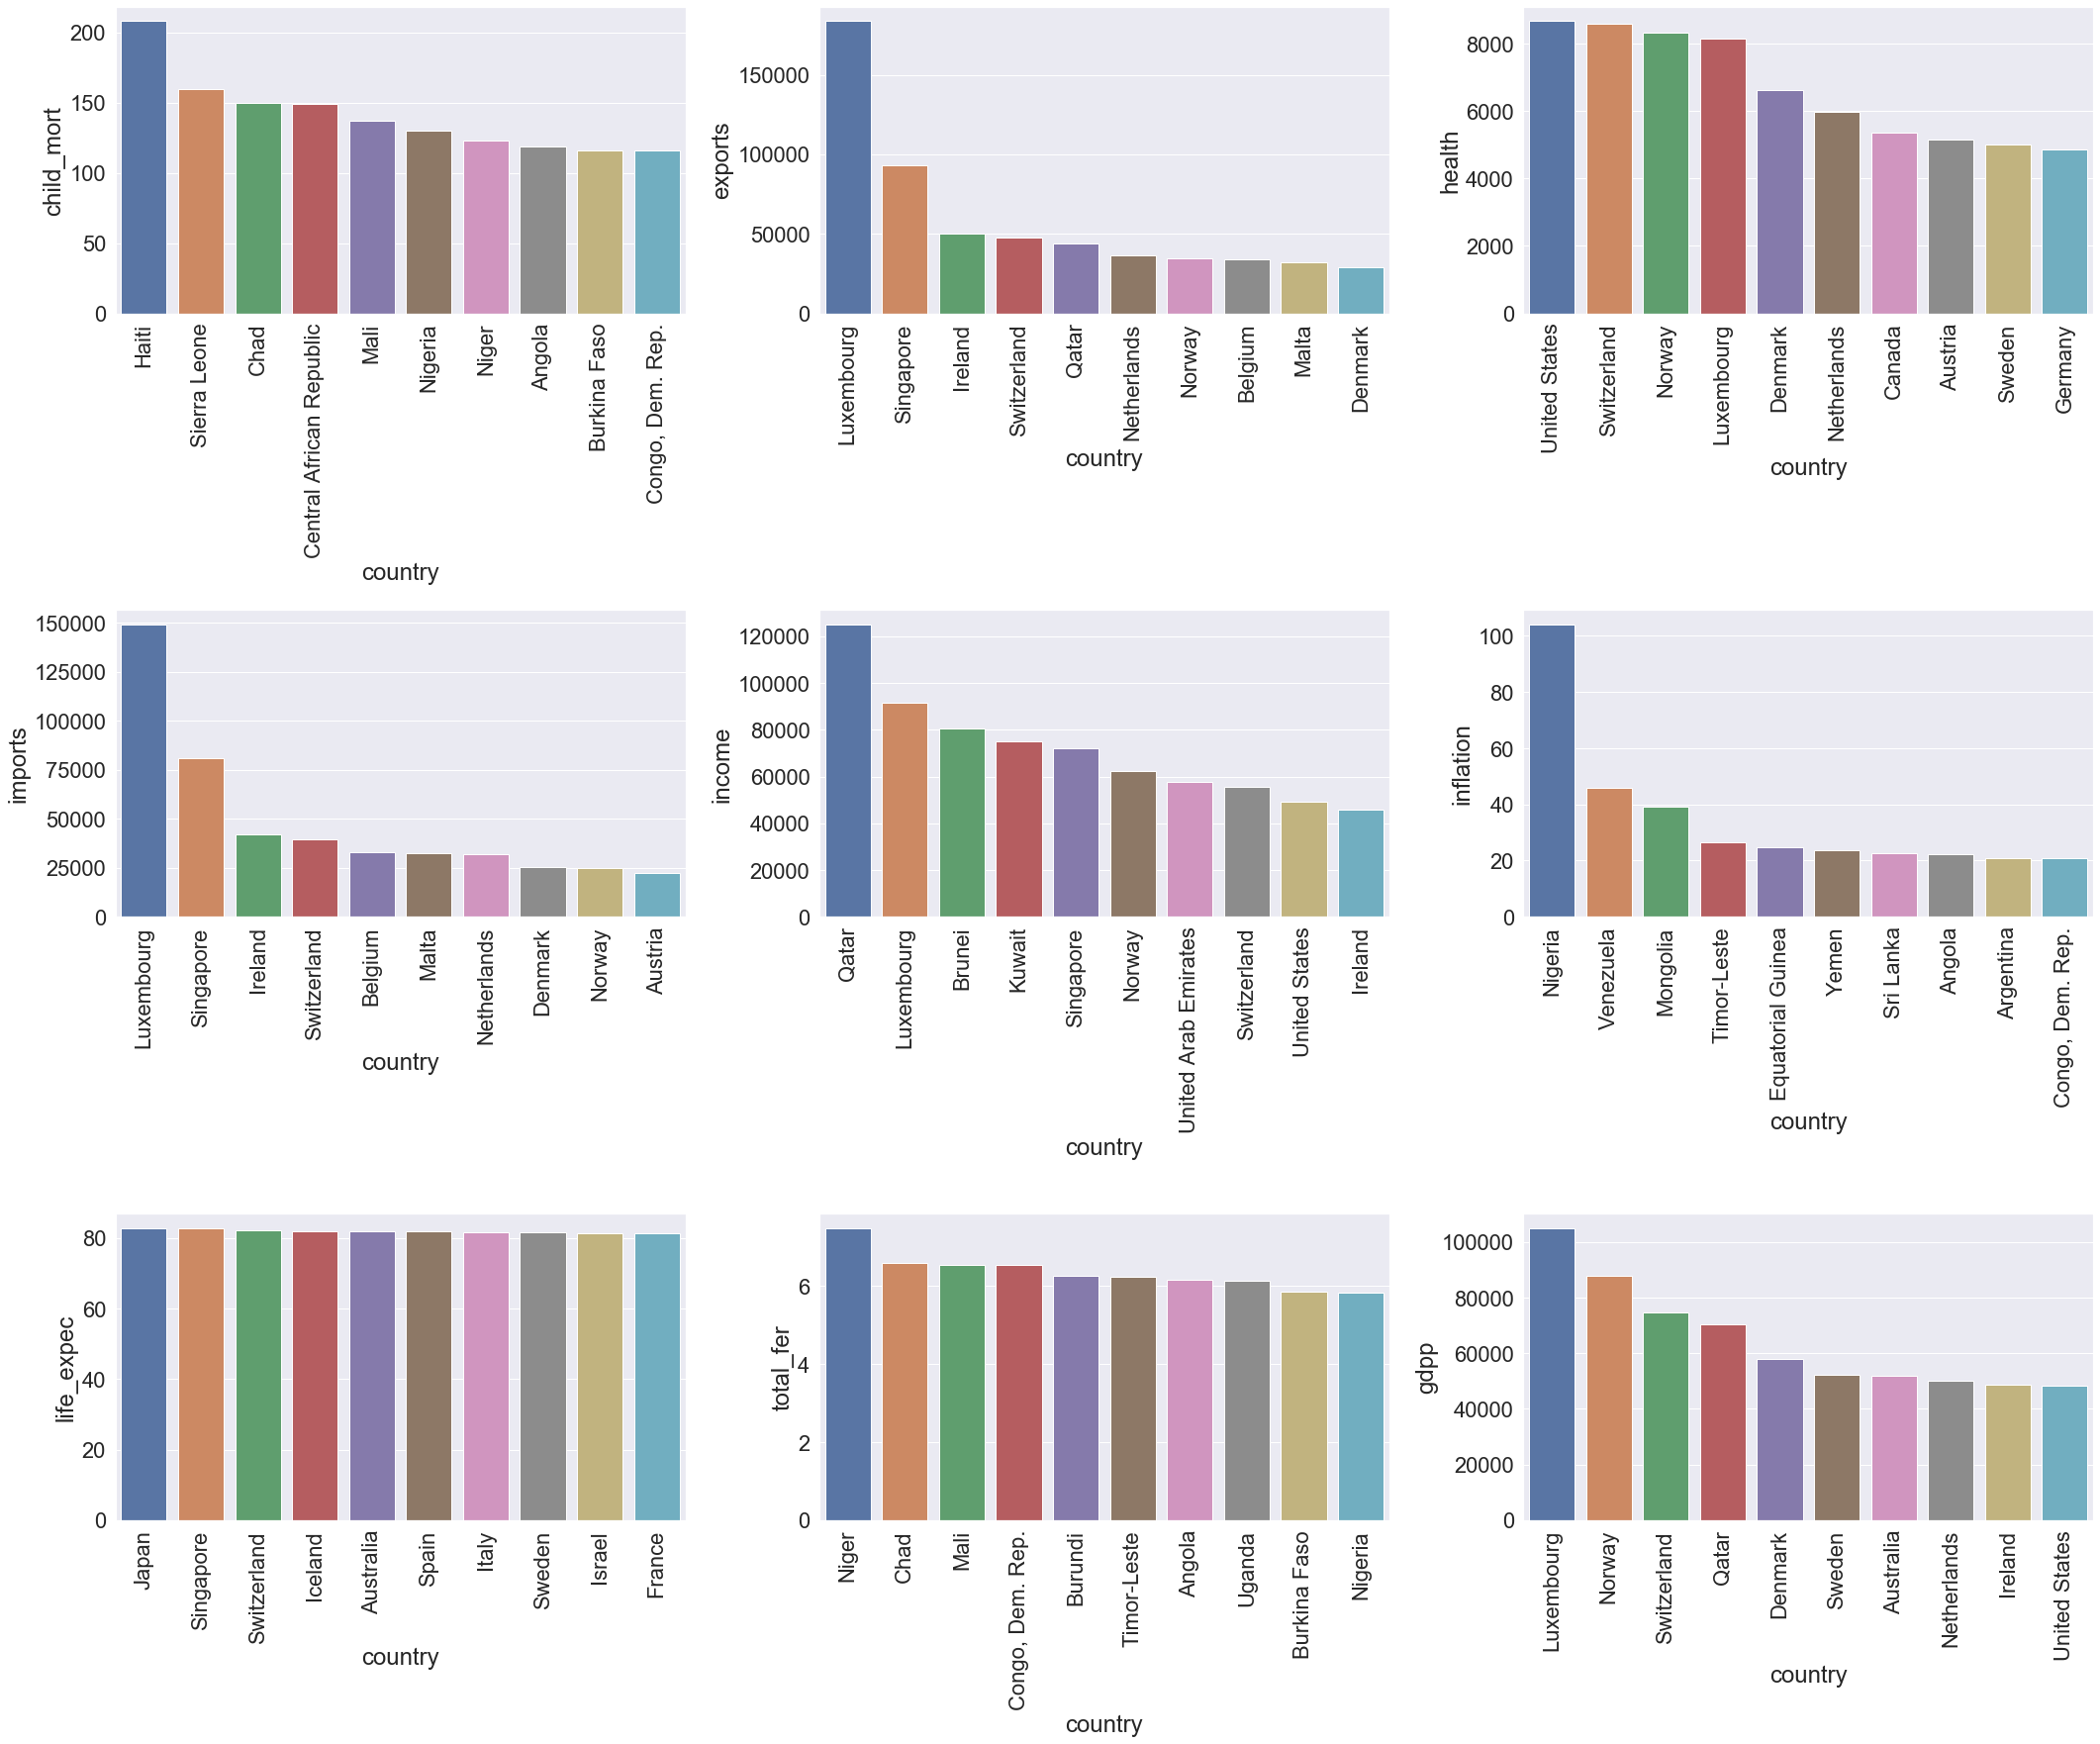

In [13]:
sns.set(font_scale=2)
plt.figure(figsize=(30,25))
for i in enumerate(col[1:]):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(x='country',y=i[1],data=ngo_dataset[['country',i[1]]].sort_values(i[1],ascending=False).head(10))
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Observations :
* Haiti has the highest child mortality rate.
* Luxembourg has the highest number of exports,imports and highest GDPP as well.
* Niger has the highest fertility rate
* Nigeria has the most inflation.
* Income of Qatar is the highest.
* United States spend most on Health on GDPP per capita

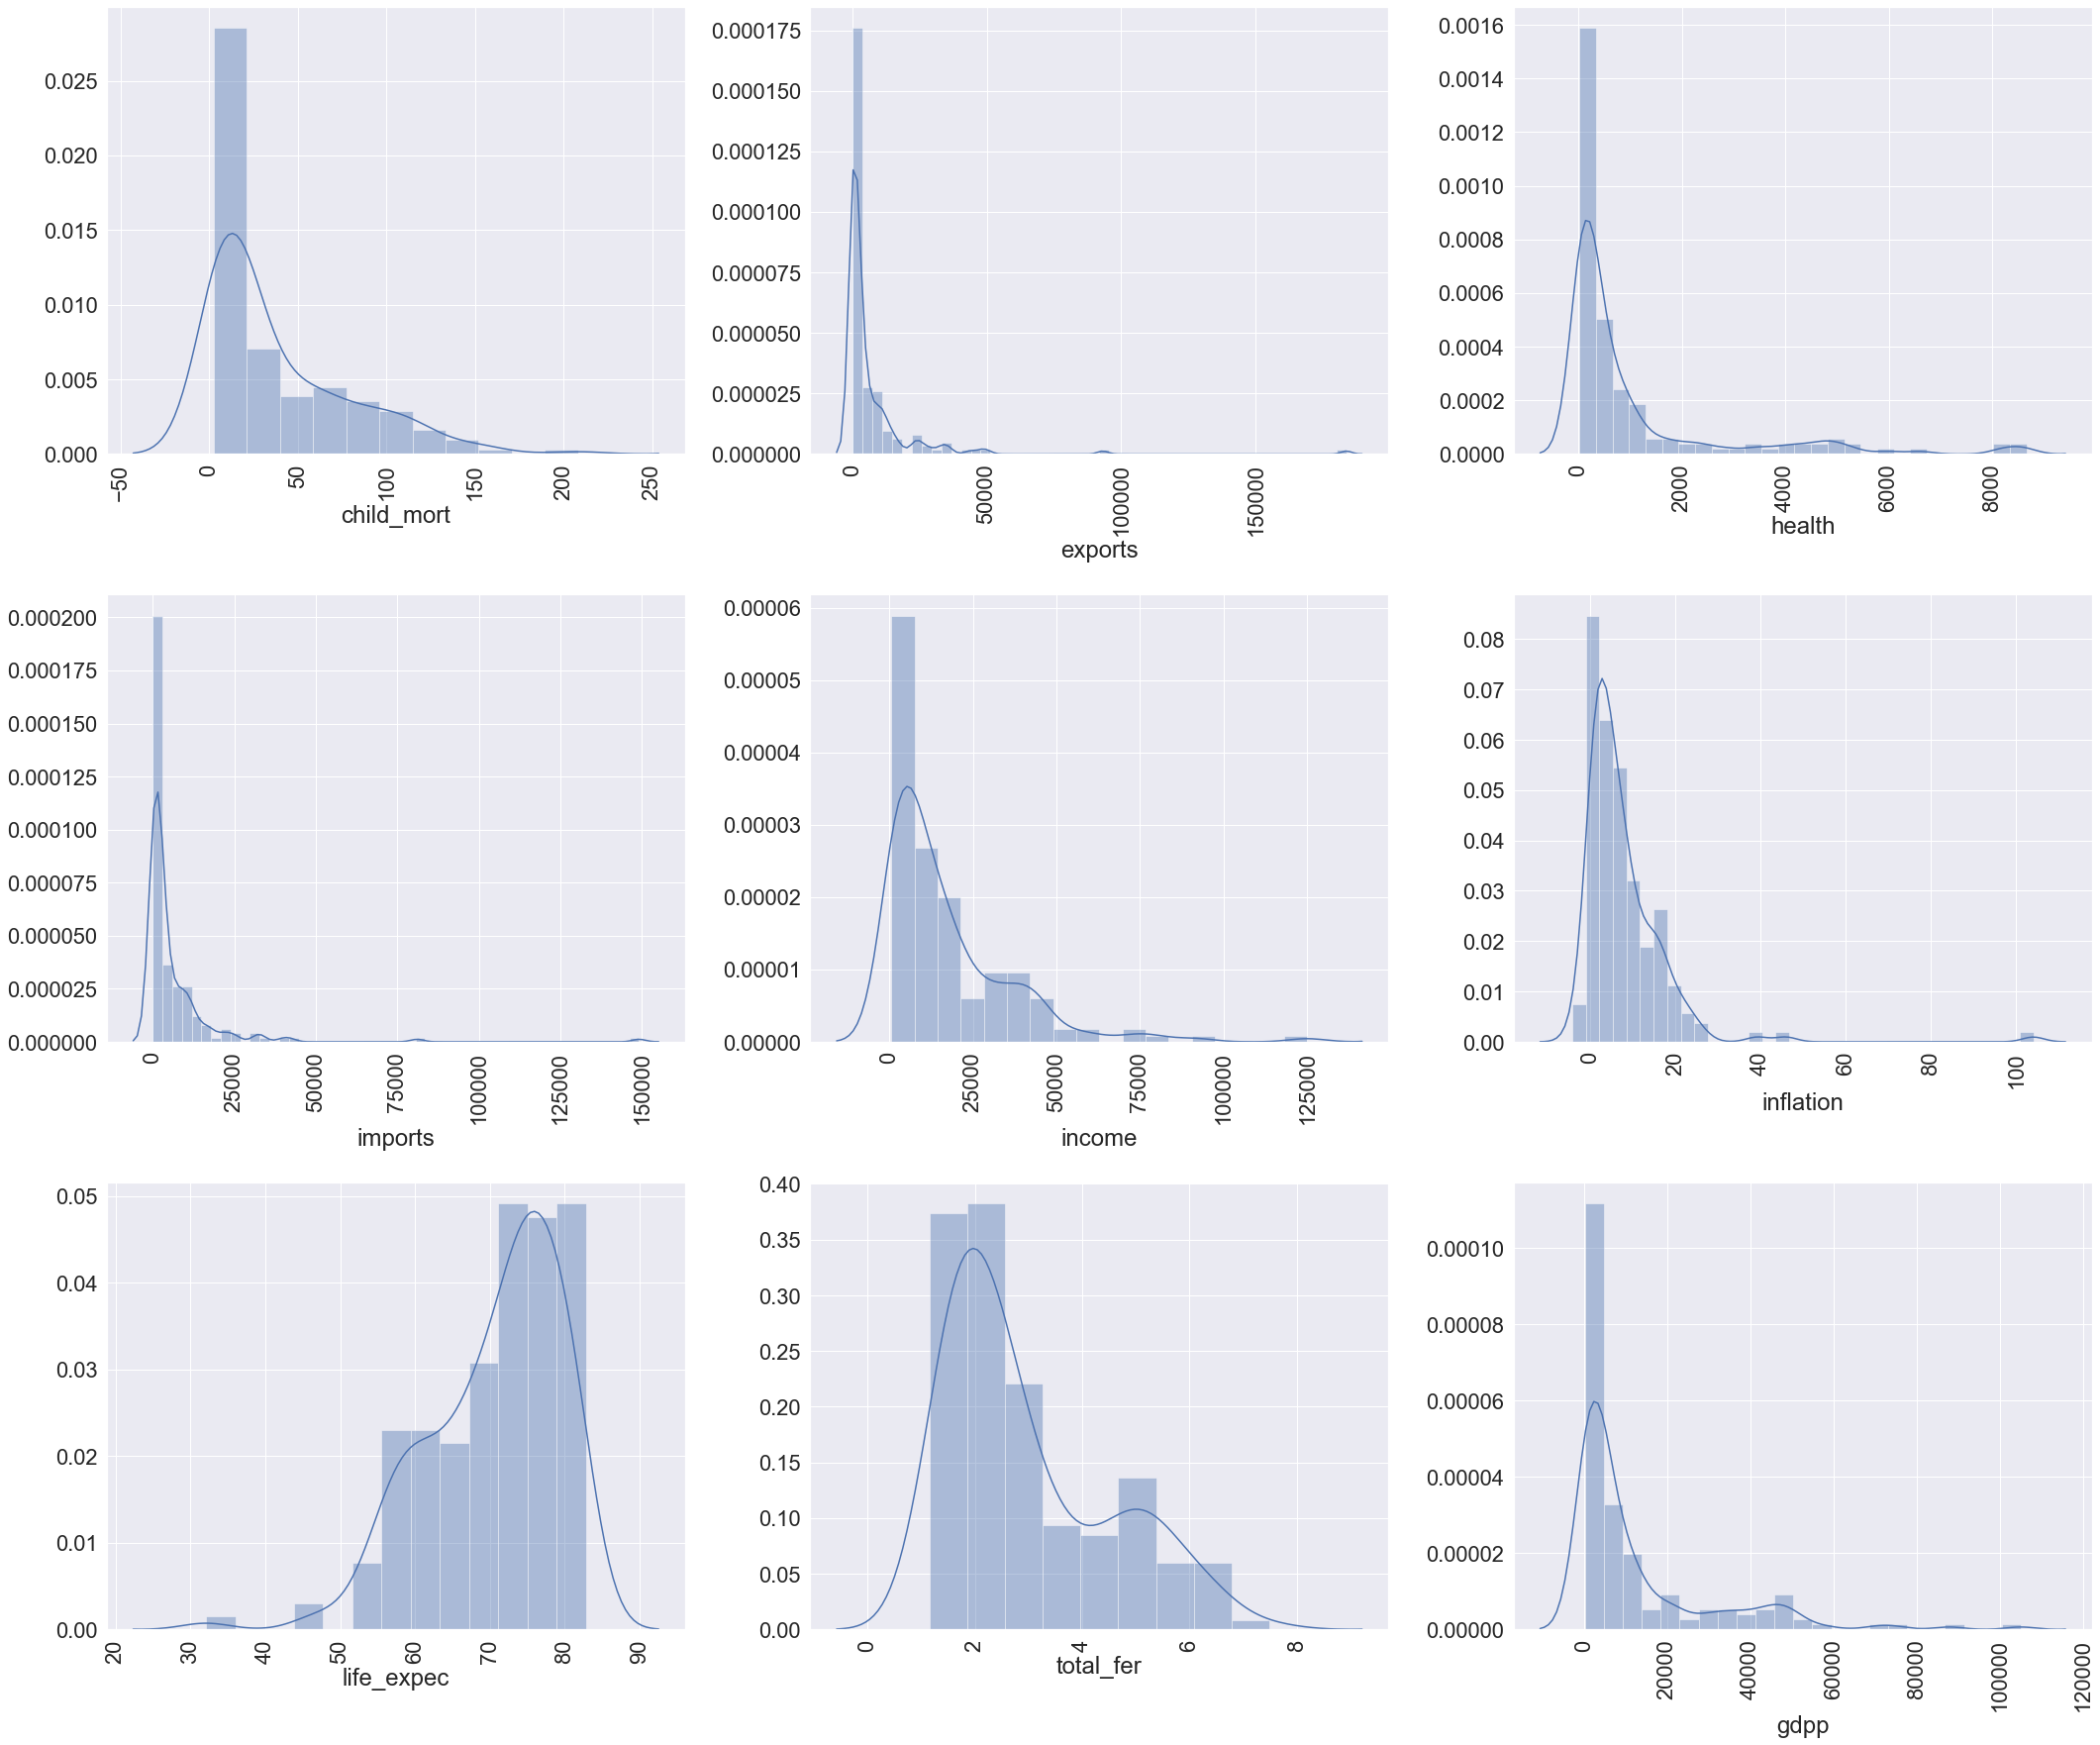

In [14]:
sns.set(font_scale=2)
plt.figure(figsize=(30,25))
for i in enumerate(col[1:]):
#     plt.figure(figsize=(30,25))
    plt.subplot(3,3,i[0]+1)
    sns.distplot(ngo_dataset[i[1]])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Observations :
From the Distplot we can see that 

- child_mort,exports and health
>* They are normally distributed with some skewness.
>* The values belong to the specific range.
>* These columns doesnot have any internal groupings.
- life_expec, total_fer, income
>* They are binomially distributed
>* Showing signs of having internal groupings in the data.

- All the columns are useful to perform Clustering

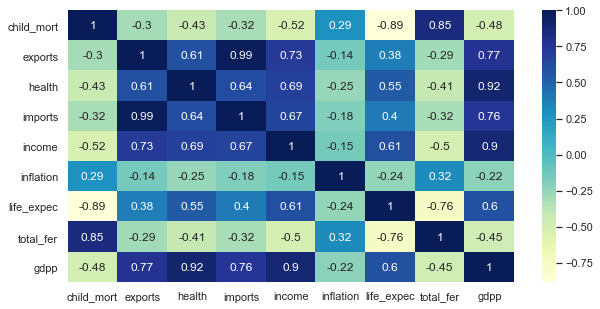

In [15]:
plt.figure(figsize=(10,5))
sns.set(font_scale=1)
sns.heatmap(ngo_dataset[col].corr(), annot=True,cmap='YlGnBu');

### Observations :
- We  can see high correlation between 
>* imports and exports
>* gdpp and health
>* gdpp and income
>* total_fer and child_mort

<Figure size 864x432 with 0 Axes>

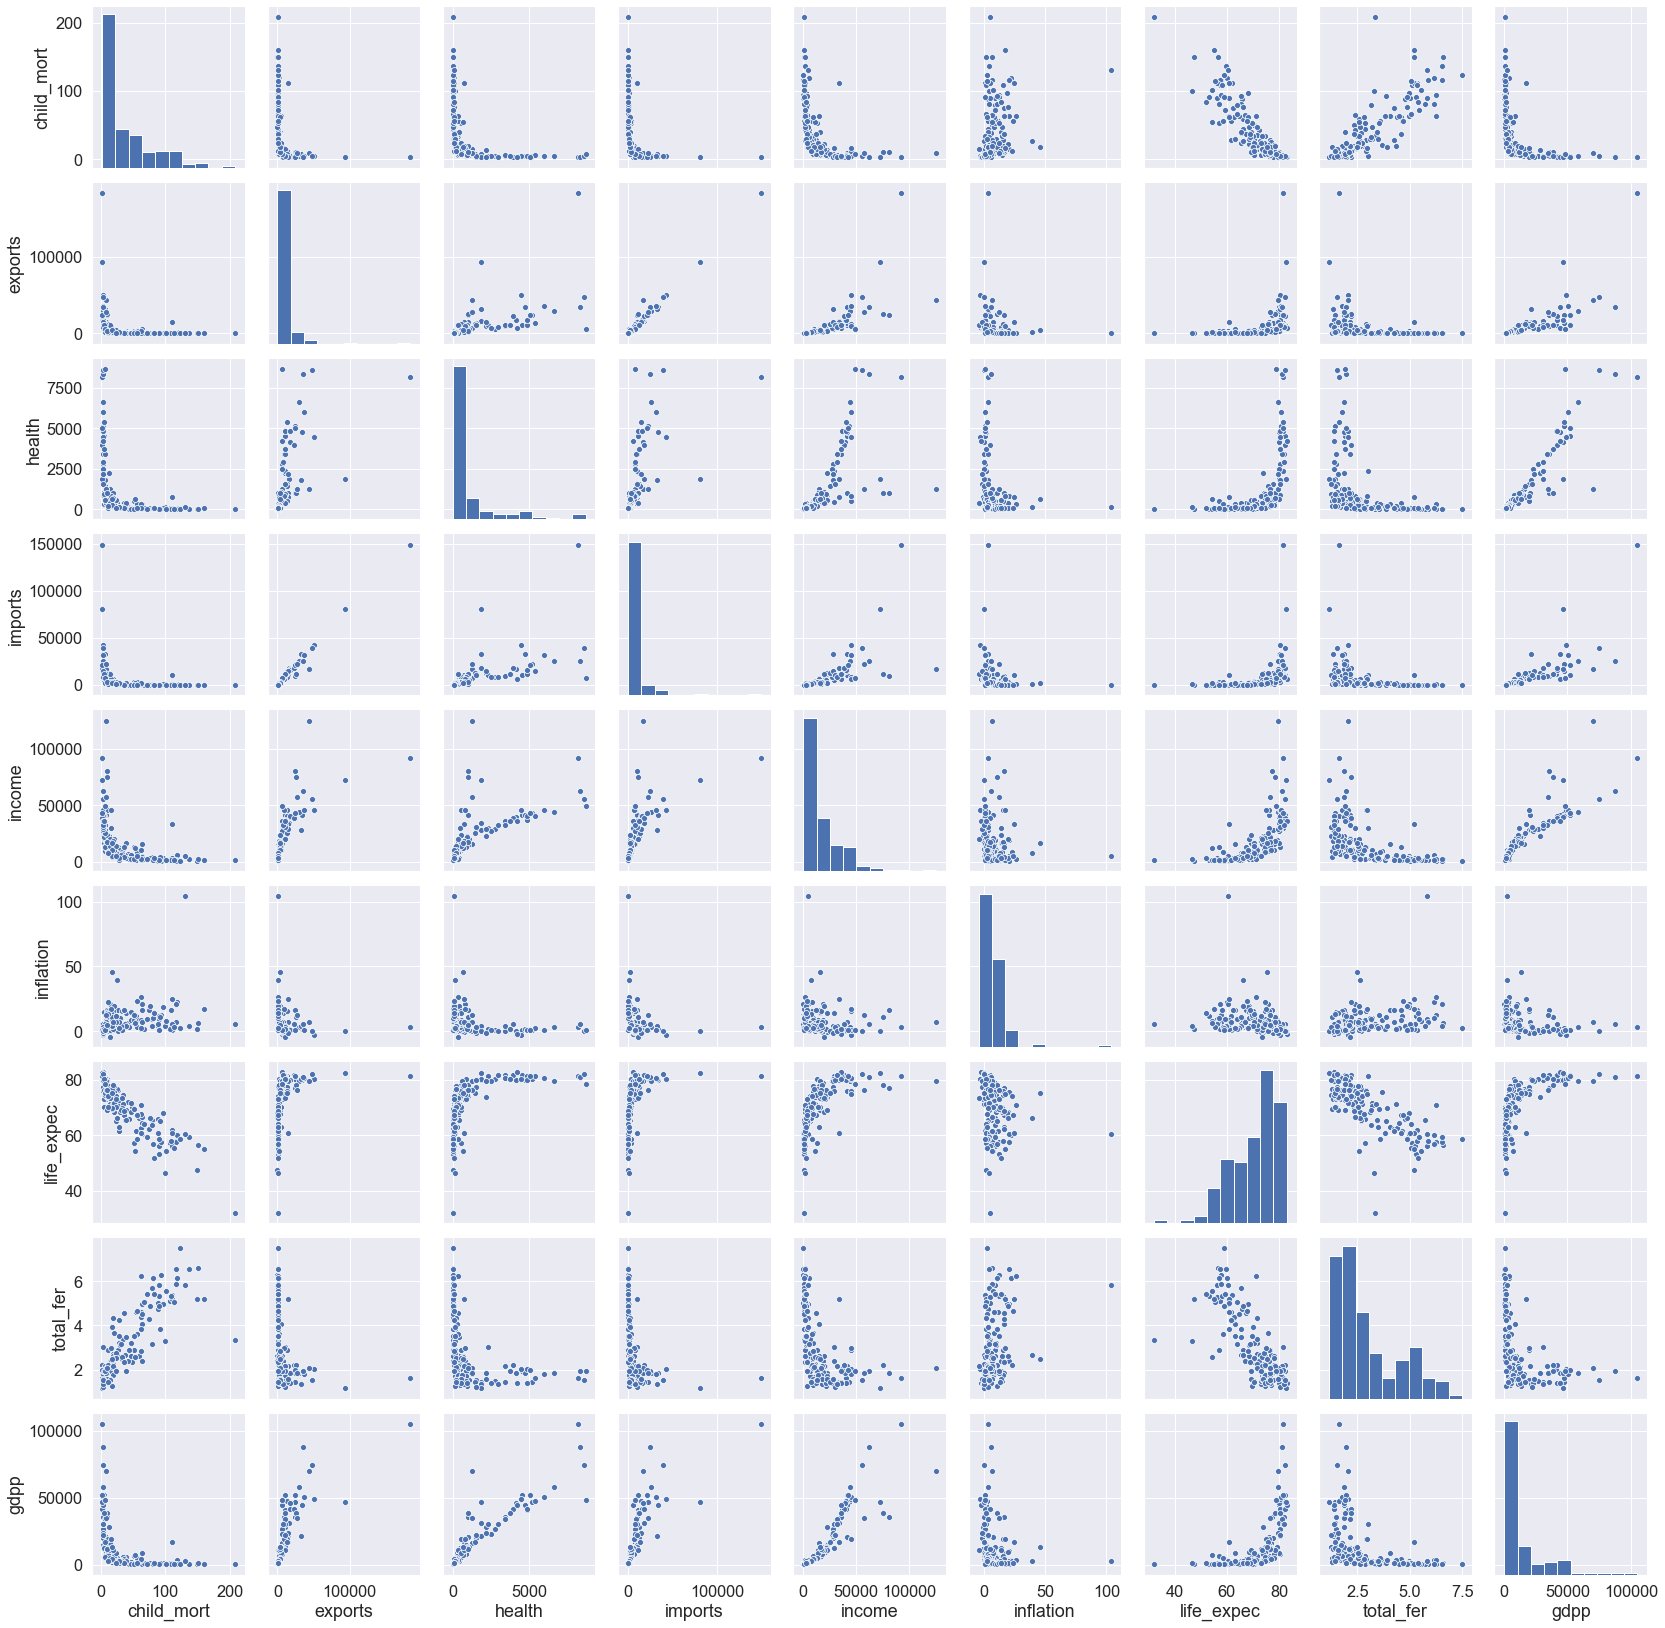

In [16]:
sns.set(font_scale=1.49)
plt.figure(figsize=(12,6))
sns.pairplot(ngo_dataset.drop('country',axis=1));
plt.show()

### Observations :
- We can see that health and income are linearlly related to gdpp
- child_mort and total_fer linearlly related
- life_expec and child_mort are inversly related

## 3.Outlier treatment

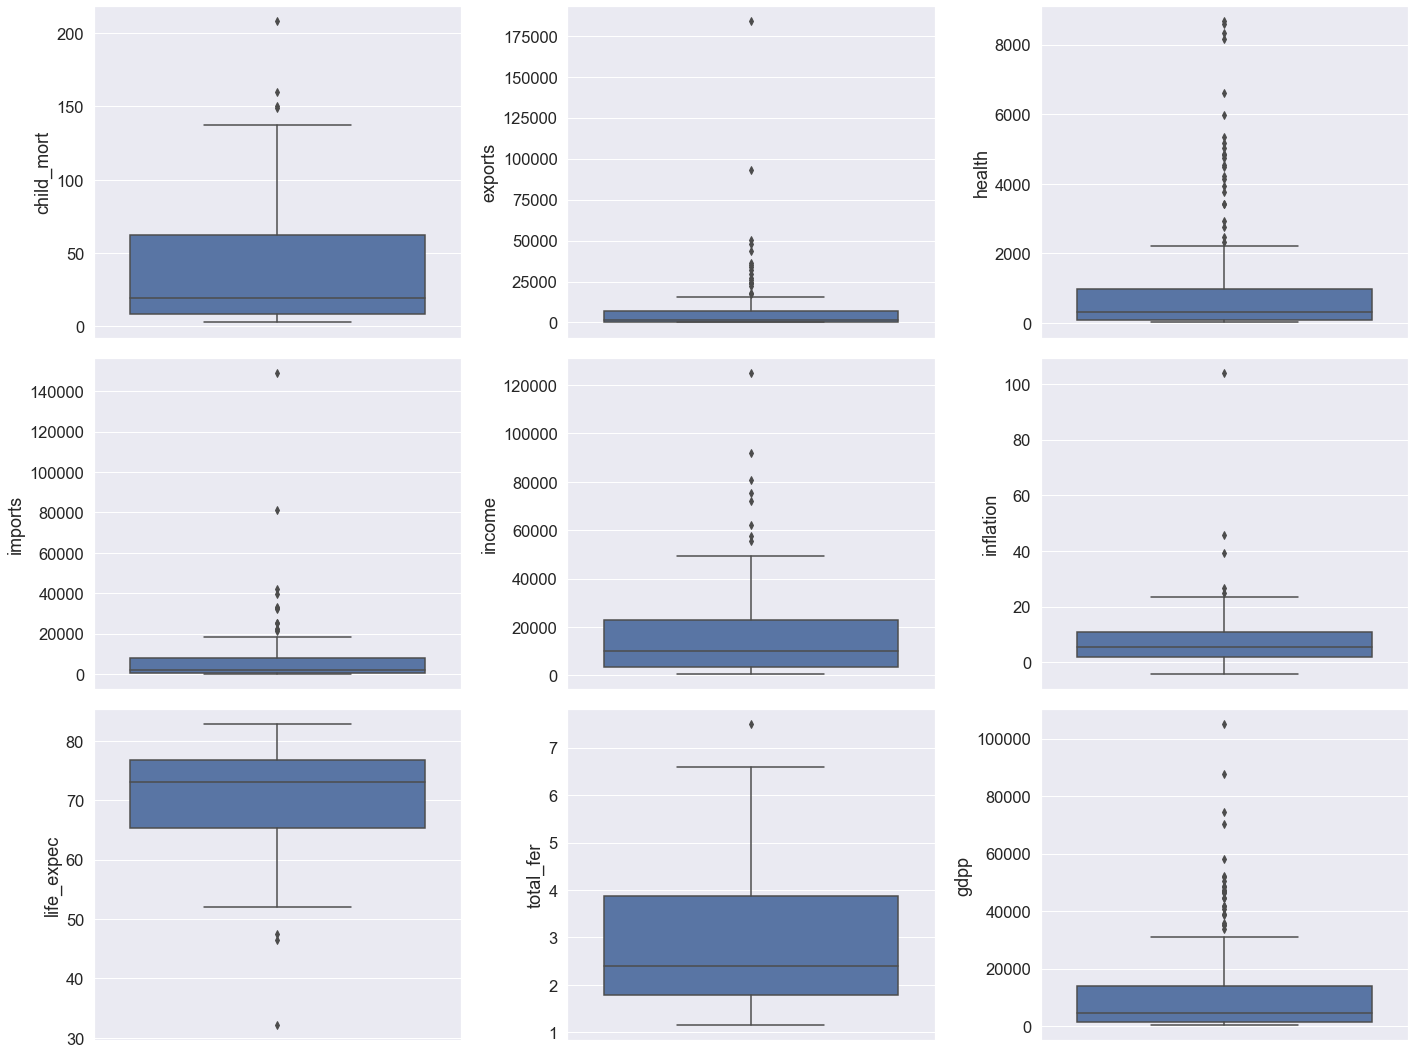

In [17]:
sns.set(font_scale=1.5)
plt.figure(figsize=(20,15))
for i in enumerate(col[1:]):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(ngo_dataset[i[1]],orient='v')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Obseravtions:
Outliers can be seen in :
- child_mort
- exports
- health
- imports
- income
- inflation
- life_expec
- gdpp

In [18]:
# We will be performing hard capping on 'exports', 'health', 'imports', 'income', 'life_expec', 'gdpp'

col_cap=['exports', 'health', 'imports', 'income', 'life_expec', 'gdpp']
for i in col_cap:
    percentiles = ngo_dataset[i].quantile([0.05, 0.95]).values
    ngo_dataset[i][ngo_dataset[i] >= percentiles[1]] = percentiles[1]

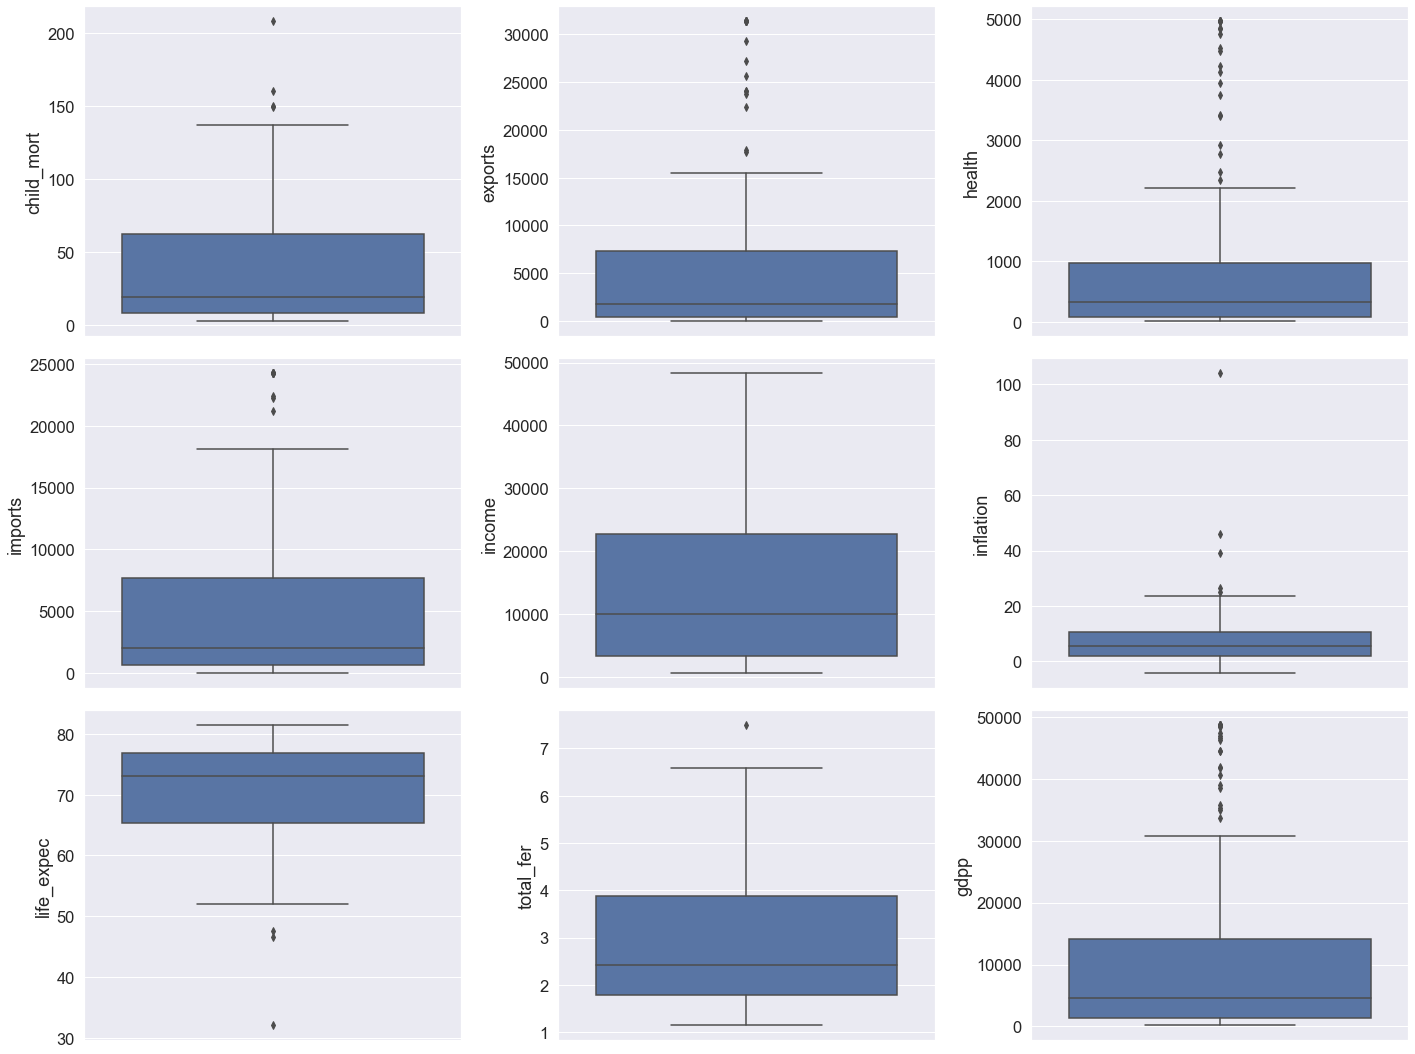

In [19]:
# Looking at boxplots after hard capping

sns.set(font_scale=1.5)
plt.figure(figsize=(20,15))
for i in enumerate(col[1:]):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(ngo_dataset[i[1]],orient='v')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 4.Checking the cluster tendency: Hopkin's test

Hopkin's Test is the statistical way of measuring the cluster tendency of a data set.

In [20]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [21]:
# It indicates the cluster tendency, in other words, how well a data can be clustered
for i in range(50):
    print(hopkins(ngo_dataset.drop('country', axis=1)), end=' | ')

0.8809261338627045 | 0.9127444243226099 | 0.891305410335371 | 0.9185074599674657 | 0.8187041424617846 | 0.8147401240088659 | 0.9288532073579975 | 0.8997604340134511 | 0.8790533442962842 | 0.9002056886962543 | 0.8853495364270517 | 0.8293797702287886 | 0.8836230172909025 | 0.8881342549422205 | 0.8812568586773724 | 0.903865153485737 | 0.8810422710323478 | 0.9408684039328372 | 0.8926825869291696 | 0.870126161223828 | 0.8968584241921423 | 0.8720969845603105 | 0.8908938866145844 | 0.8572798751345918 | 0.9129546376881547 | 0.8944320518118662 | 0.8533475185776221 | 0.8995524456341858 | 0.8544198895112488 | 0.9253144867017395 | 0.9162371926714397 | 0.9325338405242127 | 0.9007537796428158 | 0.9160246848950768 | 0.9231094239175213 | 0.8824458962072865 | 0.8765208842579174 | 0.903352861286764 | 0.8586721090640398 | 0.939387781115062 | 0.8934858224939618 | 0.9098114543566573 | 0.915208084957884 | 0.9250915955005888 | 0.8773766852770586 | 0.8995030779220439 | 0.8792499887124793 | 0.8971144284555768 

 We can see the values are above 80%. So, it has higher possibility to invent clusters in the data.

## 5.Scaling

In [22]:
# Importing Libraries
from sklearn.preprocessing import StandardScaler

In [23]:
# Standard Scaler

ss=StandardScaler()
scaled_ngo=ss.fit_transform(ngo_dataset.drop('country', axis=1))
scaled_ngo

array([[ 1.29153238, -0.66958102, -0.62943544, ..., -1.62318027,
         1.90288227, -0.75736169],
       [-0.5389489 , -0.54217181, -0.47348864, ...,  0.65482341,
        -0.85997281, -0.52332107],
       [-0.27283273, -0.47583812, -0.53001667, ...,  0.67749012,
        -0.0384044 , -0.49883845],
       ...,
       [-0.37231541, -0.56578559, -0.59652699, ...,  0.29215616,
        -0.66120626, -0.70727157],
       [ 0.44841668, -0.63010392, -0.61153387, ..., -0.34251153,
         1.14094382, -0.70727157],
       [ 1.11495062, -0.61289625, -0.59901824, ..., -2.09918104,
         1.6246091 , -0.69734618]])

In [24]:
# scaled_ngo now contains scaled data and here I am converting it to a dataframe.

scaled_ngo=pd.DataFrame(scaled_ngo)

In [25]:
scaled_ngo.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.541946,0.013312


In [26]:
# Renaming the columns in the scaled dataframe for better readability

scaled_ngo.columns = col[1:]
scaled_ngo.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.669581,-0.629435,-0.732729,-0.958349,0.157336,-1.623180,1.902882,-0.757362
1,-0.538949,-0.542172,-0.473489,-0.472182,-0.394006,-0.312347,0.654823,-0.859973,-0.523321
2,-0.272833,-0.475838,-0.530017,-0.560152,-0.192552,0.789274,0.677490,-0.038404,-0.498838
3,2.007808,-0.418960,-0.588935,-0.543087,-0.667360,1.387054,-1.181180,2.128151,-0.560376
4,-0.695634,-0.027134,-0.150685,0.306422,0.227992,-0.601749,0.711490,-0.541946,0.013312


## 6.Find the best value of k: Silhoutte Score and SSD (Elbow).

In [27]:
# Importing Libraries

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
# Silhoutte Score

sil=[]
for k in range(2,11):
    Kmean=KMeans(n_clusters=k).fit(scaled_ngo)
    sil.append([k,silhouette_score(scaled_ngo,Kmean.labels_)])
sil

[[2, 0.49338962509744233],
 [3, 0.4309451148939976],
 [4, 0.40389861188897697],
 [5, 0.4081234434213273],
 [6, 0.3213203827606903],
 [7, 0.29981418973352214],
 [8, 0.28998440156116384],
 [9, 0.3065469272216821],
 [10, 0.2687857046957093]]

In [29]:
sil=pd.DataFrame(sil)
sil

,0,1
0,2,0.493390
1,3,0.430945
2,4,0.403899
3,5,0.408123
4,6,0.321320
5,7,0.299814
6,8,0.289984
7,9,0.306547
8,10,0.268786


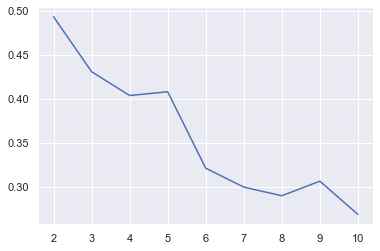

In [30]:
sns.set(font_scale=1)
plt.plot(sil[0],sil[1])
plt.show();

### Seems like optimal number of clusters should be 3 as per silhouette analysis

In [31]:
#SSD: Elbow

ssd=[]
for k in range(2,11):
    Kmean=KMeans(n_clusters=k).fit(scaled_ngo)
    ssd.append([k,Kmean.inertia_])
ssd

[[2, 768.0315447514072],
 [3, 488.3635527863119],
 [4, 409.655221270902],
 [5, 330.55787367518644],
 [6, 284.79069835174516],
 [7, 259.26059223783477],
 [8, 233.2313940448271],
 [9, 209.31313786510182],
 [10, 189.61849258290735]]

In [32]:
ssd=pd.DataFrame(ssd)
ssd

,0,1
0,2,768.031545
1,3,488.363553
2,4,409.655221
3,5,330.557874
4,6,284.790698
5,7,259.260592
6,8,233.231394
7,9,209.313138
8,10,189.618493


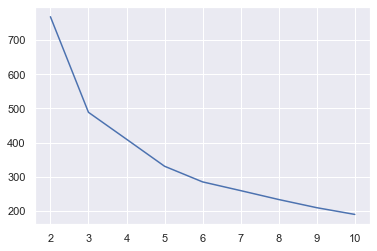

In [33]:
sns.set(font_scale=1)
plt.plot(ssd[0],ssd[1])
plt.show();

### As per elbow curve we can consider 3 and 5 for the no of clusters. 
### But comparing both Elbow and Silhouette Analysis let the number of clusters be 3

## 7.Using the final value of k perform the k mean analysis
* Final value of k=3

In [34]:
Kmean=KMeans(n_clusters=3,random_state=0)
Kmean.fit(scaled_ngo)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [35]:
#Let's see what are the centroid values
Kmean.cluster_centers_

array([[ 1.32661038, -0.57328314, -0.57912424, -0.64604192, -0.80319847,
         0.39181237, -1.2786936 ,  1.3543418 , -0.66762241],
       [-0.82153348,  1.51937833,  1.60921767,  1.58156989,  1.55820451,
        -0.49277884,  1.05210334, -0.78995685,  1.70364959],
       [-0.40586049, -0.34999278, -0.38711086, -0.33546432, -0.23292732,
        -0.00700215,  0.27377402, -0.4363415 , -0.37791657]])

In [36]:
Kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [37]:
ngo_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200


In [38]:
# Now lets  assign the above labels to the original DataFrame
ngo_dataset['labels']=Kmean.labels_

In [39]:
ngo_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


In [40]:
ngo_dataset.labels.value_counts()

2    82
0    48
1    37
Name: labels, dtype: int64

## 8.Visualizing the cluster with scatter plot

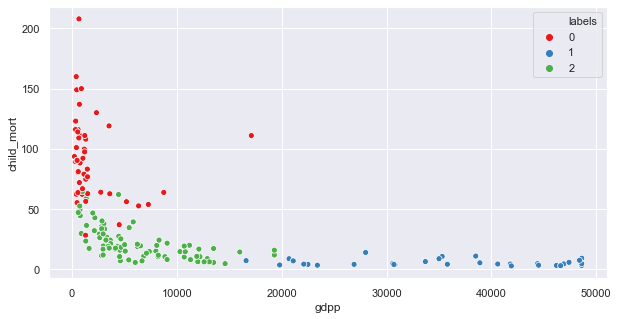

In [41]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='gdpp',y='child_mort',hue='labels',data = ngo_dataset,legend='full',palette="Set1")
plt.show();

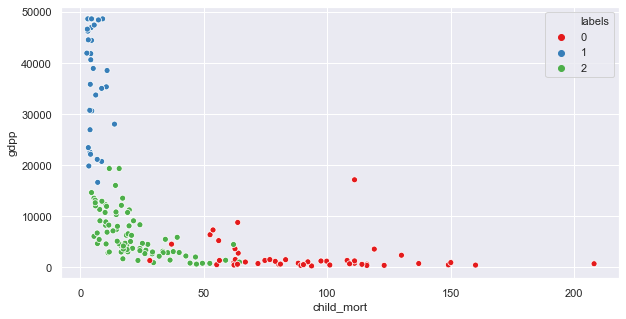

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='child_mort',y='gdpp',hue='labels',data = ngo_dataset,legend='full',palette="Set1")
plt.show();

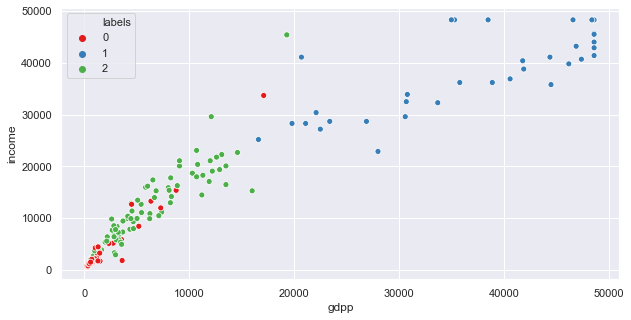

In [43]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='gdpp',y='income',hue='labels',data = ngo_dataset,legend='full',palette="Set1")
plt.show();

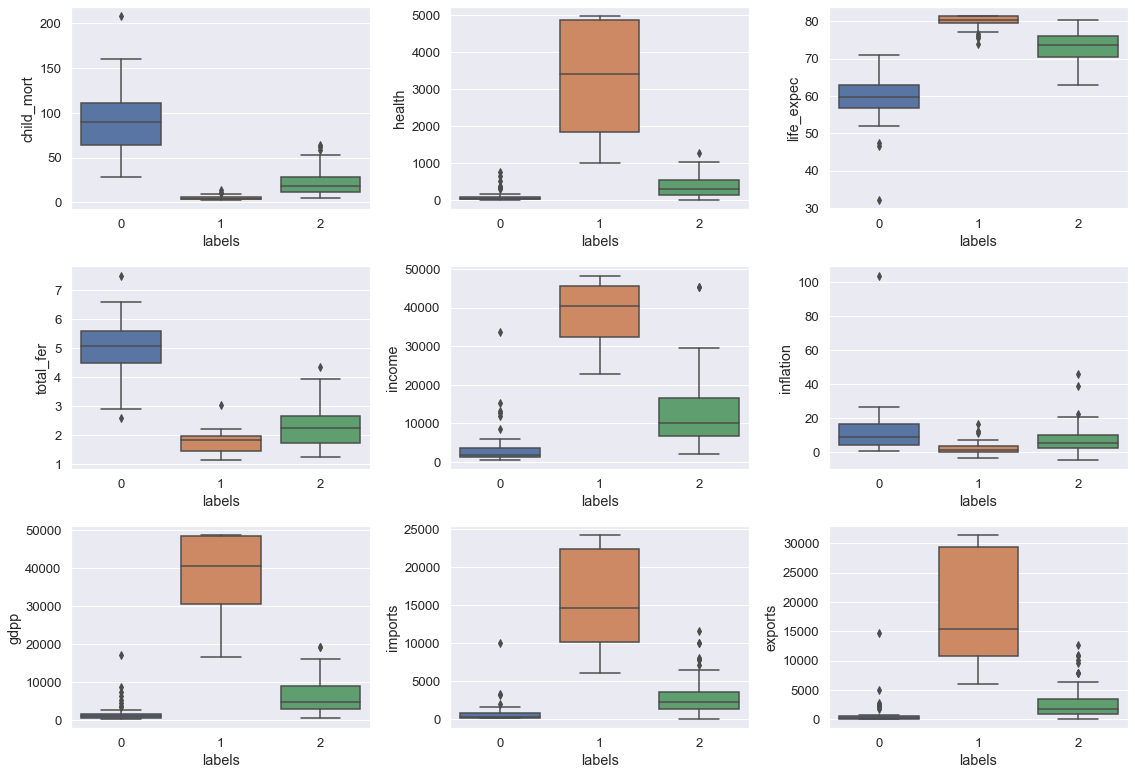

In [44]:
# Box plot on Original attributes to visualize the spread of the data
sns.set(font_scale=1.2)
fig, axs = plt.subplots(3,3, figsize = (16,11))
plt1 = sns.boxplot(x='labels', y = 'child_mort', data=ngo_dataset, ax = axs[0,0])
plt2 = sns.boxplot(x='labels', y = 'health', data=ngo_dataset, ax = axs[0,1])
plt3 = sns.boxplot(x='labels', y = 'life_expec', data=ngo_dataset, ax = axs[0,2])
plt4 = sns.boxplot(x='labels', y = 'total_fer', data=ngo_dataset, ax = axs[1,0])
plt5 = sns.boxplot(x='labels', y = 'income', data=ngo_dataset, ax = axs[1,1])
plt6 = sns.boxplot(x='labels', y = 'inflation', data=ngo_dataset, ax = axs[1,2])
plt7 = sns.boxplot(x='labels', y = 'gdpp', data=ngo_dataset, ax = axs[2,0])
plt8 = sns.boxplot(x='labels', y = 'imports', data=ngo_dataset, ax = axs[2,1])
plt9 = sns.boxplot(x='labels', y = 'exports', data=ngo_dataset, ax = axs[2,2])
plt.tight_layout()
plt.show();

### Observations :
* We can straightaway see that Cluster 0 countries have:
      a. high child mortality rate.
      b. low health.
      c. low life expectancy.
      d. low income rates.
      e. high inflation
      f. low GDPP
      g. lowest imports and exports
#### Hence, we can say that cluster 0 countries are in dire need of development as they have high Child Mortality Rate, lowest GDPP                  and low Income.  

## 9.Cluster profiling : GDPP, child_mort, income

In [45]:
ngo_dataset[['child_mort','income','gdpp','labels']].groupby('labels').mean()

,child_mort,income,gdpp
labels,,,
0,91.610417,3897.354167,1909.208333
1,5.237838,38711.081081,37745.675676
2,21.951220,12304.756098,6287.463415


<Figure size 2160x1800 with 0 Axes>

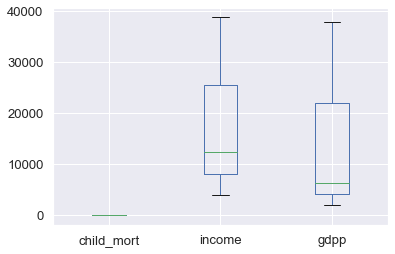

In [46]:
plt.figure(figsize=(30,25))
ngo_dataset[['child_mort','income','gdpp','labels']].groupby('labels').mean().plot(kind='box')
plt.show();

In [47]:
c1=ngo_dataset[ngo_dataset['labels']==0]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769,0


In [48]:
# List of countries that needed help
c1.sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482,0


## 10.Hierarchical clustering

• Single linkage: It is defined as the shortest distance between any 2 points in the clusters.

In [49]:
# Importing Libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

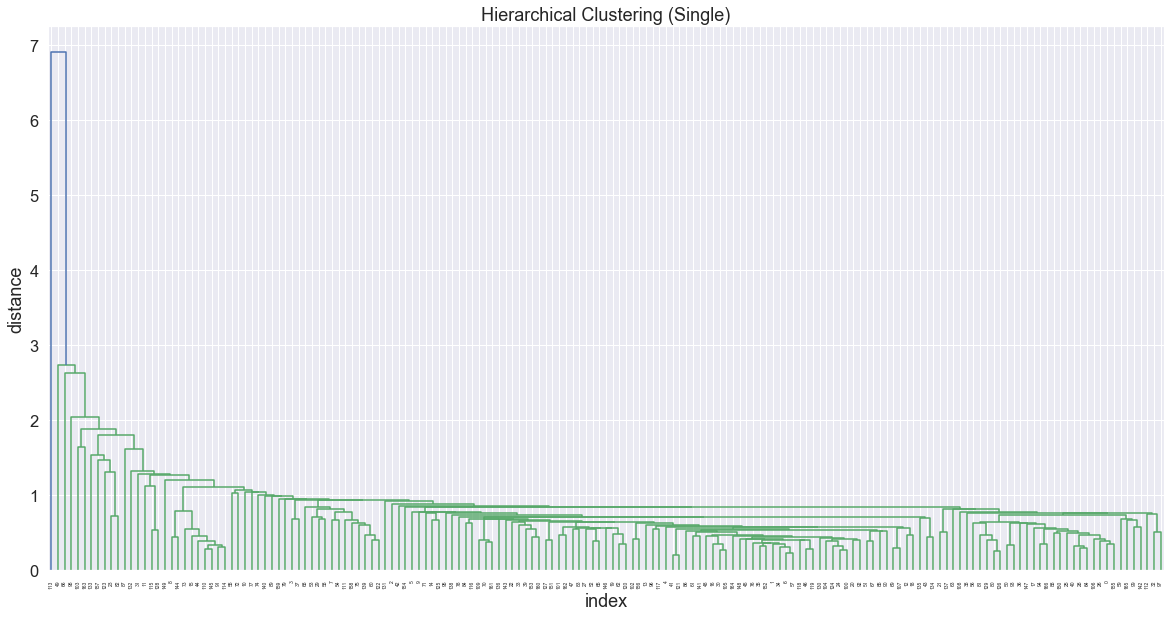

In [50]:
# Single Hierarchical Clustering
sns.set(font_scale=1.5)

plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering (Single)')
plt.xlabel('index')
plt.ylabel('distance')
merging_sin = linkage(scaled_ngo, method="single", metric='euclidean')
dendrogram(merging_sin)
plt.show()

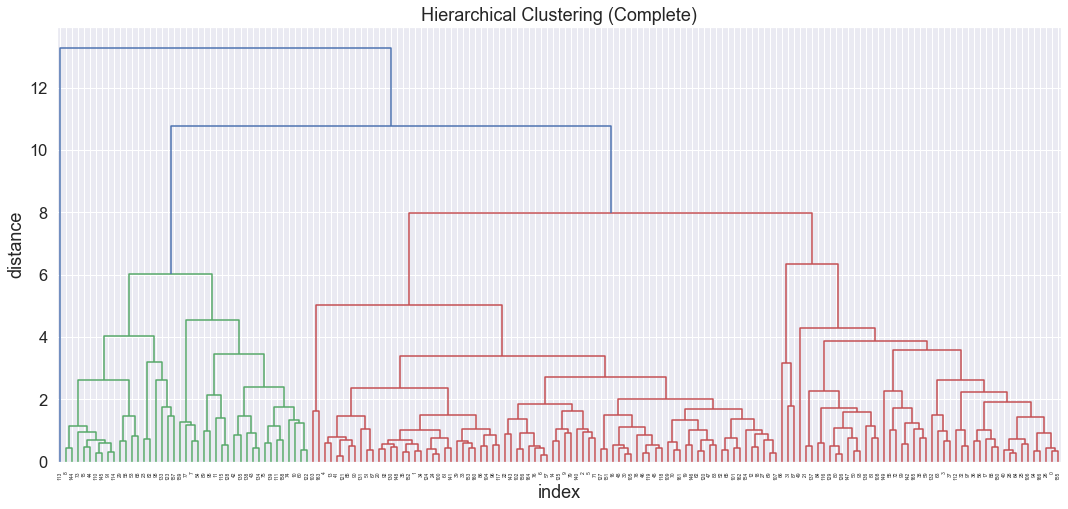

In [51]:
# Complete Hierarchical Clustering

sns.set(font_scale=1.5)
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering (Complete)')
plt.xlabel('index')
plt.ylabel('distance')
merging_com = linkage(scaled_ngo, method="complete", metric='euclidean')
dendrogram(merging_com)
plt.show()

In [52]:
# 3 clusters using Complete Hierarchical Clustering
hier_labels = cut_tree(merging_com, n_clusters=3).reshape(-1, )
hier_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [53]:
# Now lets  assign the above labels to the original DataFrame
ngo_dataset['hier_labels']=hier_labels
ngo_dataset.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,hier_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,0


In [54]:
ngo_dataset.hier_labels.value_counts()

0    125
1     41
2      1
Name: hier_labels, dtype: int64

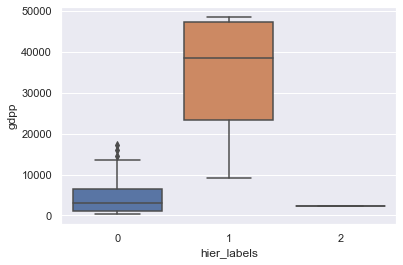

In [55]:
sns.set(font_scale=1)
sns.boxplot(x='hier_labels', y='gdpp', data=ngo_dataset)
plt.show();

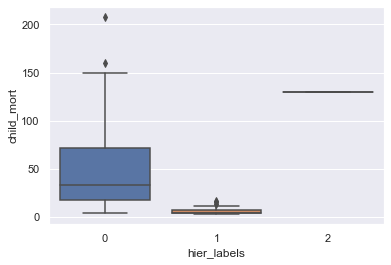

In [56]:
sns.set(font_scale=1)
sns.boxplot(x='hier_labels', y='child_mort', data=ngo_dataset)
plt.show();

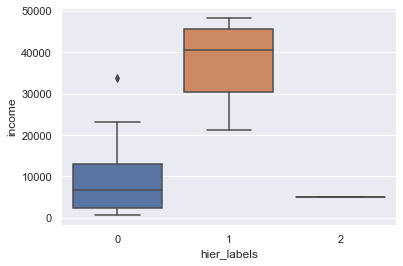

In [57]:
sns.set(font_scale=1)
sns.boxplot(x='hier_labels', y='income', data=ngo_dataset)
plt.show();

### From the above boxplots we can see that the cluster 0 has lowest income, lowest GDPP and highest child mortality rate.

In [58]:
c2=ngo_dataset[ngo_dataset['hier_labels']==0]
c2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,hier_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950.0,2.62,63.0,3.50,2970,2,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500.0,45.90,75.4,2.47,13500,2,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490.0,12.10,73.1,1.95,1310,2,0
165,Yemen,56.3,393.00,67.8580,450.640,4480.0,23.60,67.5,4.67,1310,0,0


In [59]:
#list of countries that needed help
c2.sort_values(by=['gdpp','child_mort','income'], ascending=[True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,hier_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482,0,0


# <font color = "Blue" > Final list of countries that NGO should focus upon:
    
  #### <font color = "Green" > From the above analysis we can see that we got almost the same set of countries when clustering was performed using K means and Hierarchical clustering method using K=3. Hence, we can convey to the CEO of HELP International NGO that the top 10 countries that need the most financial aid are:
    
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
